<a href="https://colab.research.google.com/github/Shrez7961/Practice/blob/main/Assignment_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

MEDV is the dependent variable.

## Using this dataset, explain your understanding of linear regression. You should do some checks on the features and the dependent variable, get some plots and distributions for the given variables. Please make this assignment as elaborate as you can.</b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing libraries
import pandas as pd
import numpy as np

In [ ]:
# Importing Data File
housing_df = pd.read_csv("/content/drive/MyDrive/ALMABETTER/Module 4: Machine Learning/Linear Regression 1/housing.csv", encoding = "unicode escape")

In [ ]:
housing_df.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [ ]:
#Lets check data first
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 1 columns):
 #   Column                                                                                            Non-Null Count  Dtype 
---  ------                                                                                            --------------  ----- 
 0    0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00  505 non-null    object
dtypes: object(1)
memory usage: 4.1+ KB


In [35]:
housing_df.describe()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
count,505
unique,505
top,0.02731 0.00 7.070 0 0.4690 6.4210 78...
freq,1


In [37]:
housing_df.columns

Index([' 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00'], dtype='object')

In [40]:
housing_df.shape

(505, 1)

In [41]:
housing_df.keys

Index([' 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00'], dtype='object')

In [84]:
housing_df.loc[0][0]

' 0.02731   0.00   7.070  0  0.4690  6.4210  78.90  4.9671   2  242.0  17.80 396.90   9.14  21.60'

We have all the values in form of list of strings which we need to convert to float to make a new data set.

In [85]:
list_of_strings = housing_df.iloc[:,0]

In [86]:
list_of_strings

0       0.02731   0.00   7.070  0  0.4690  6.4210  78...
1       0.02729   0.00   7.070  0  0.4690  7.1850  61...
2       0.03237   0.00   2.180  0  0.4580  6.9980  45...
3       0.06905   0.00   2.180  0  0.4580  7.1470  54...
4       0.02985   0.00   2.180  0  0.4580  6.4300  58...
                             ...                        
500     0.06263   0.00  11.930  0  0.5730  6.5930  69...
501     0.04527   0.00  11.930  0  0.5730  6.1200  76...
502     0.06076   0.00  11.930  0  0.5730  6.9760  91...
503     0.10959   0.00  11.930  0  0.5730  6.7940  89...
504     0.04741   0.00  11.930  0  0.5730  6.0300  80...
Name:  0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00, Length: 505, dtype: object

In [87]:
len(list_of_strings)

505

In [88]:
#Creating a function to map list of strings in single list
def map_(k):
  s=[]
  for i in k:
    n=float(i)
    s.append(n)
  return (s)

In [89]:
#Appliying map function on list of strings

a=[]
for i in range(len(list_of_strings)):
  a.append(map_(list_of_strings[i].split()))
print(a)

[[0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.9, 9.14, 21.6], [0.02729, 0.0, 7.07, 0.0, 0.469, 7.185, 61.1, 4.9671, 2.0, 242.0, 17.8, 392.83, 4.03, 34.7], [0.03237, 0.0, 2.18, 0.0, 0.458, 6.998, 45.8, 6.0622, 3.0, 222.0, 18.7, 394.63, 2.94, 33.4], [0.06905, 0.0, 2.18, 0.0, 0.458, 7.147, 54.2, 6.0622, 3.0, 222.0, 18.7, 396.9, 5.33, 36.2], [0.02985, 0.0, 2.18, 0.0, 0.458, 6.43, 58.7, 6.0622, 3.0, 222.0, 18.7, 394.12, 5.21, 28.7], [0.08829, 12.5, 7.87, 0.0, 0.524, 6.012, 66.6, 5.5605, 5.0, 311.0, 15.2, 395.6, 12.43, 22.9], [0.14455, 12.5, 7.87, 0.0, 0.524, 6.172, 96.1, 5.9505, 5.0, 311.0, 15.2, 396.9, 19.15, 27.1], [0.21124, 12.5, 7.87, 0.0, 0.524, 5.631, 100.0, 6.0821, 5.0, 311.0, 15.2, 386.63, 29.93, 16.5], [0.17004, 12.5, 7.87, 0.0, 0.524, 6.004, 85.9, 6.5921, 5.0, 311.0, 15.2, 386.71, 17.1, 18.9], [0.22489, 12.5, 7.87, 0.0, 0.524, 6.377, 94.3, 6.3467, 5.0, 311.0, 15.2, 392.52, 20.45, 15.0], [0.11747, 12.5, 7.87, 0.0, 0.524, 6.009, 82.9, 6.2267, 5.0, 311.

In [92]:
df= pd.DataFrame(data= a, columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])

In [94]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7


In [96]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    float64
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    float64
 9   TAX      505 non-null    float64
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(14)
memory usage: 55.4 KB


No null values is present in the dataset

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

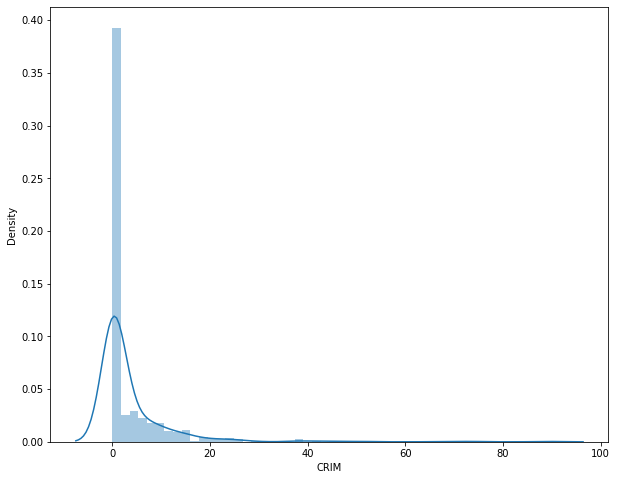

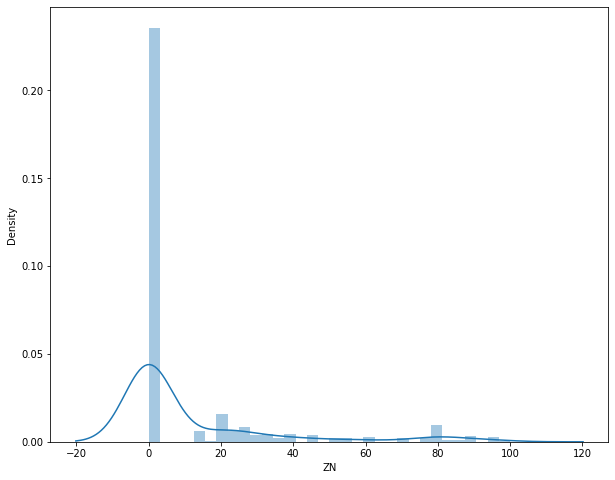

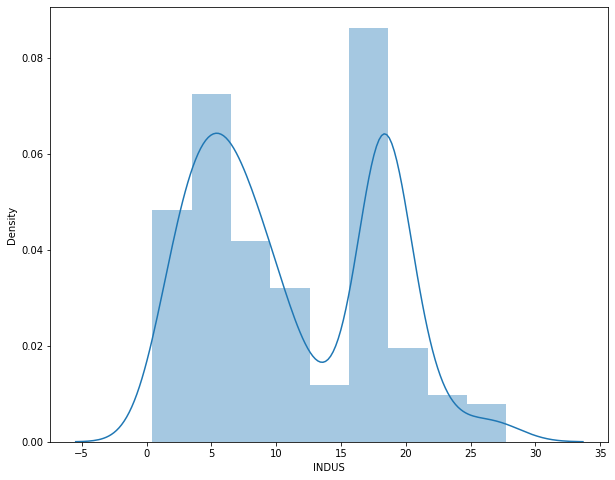

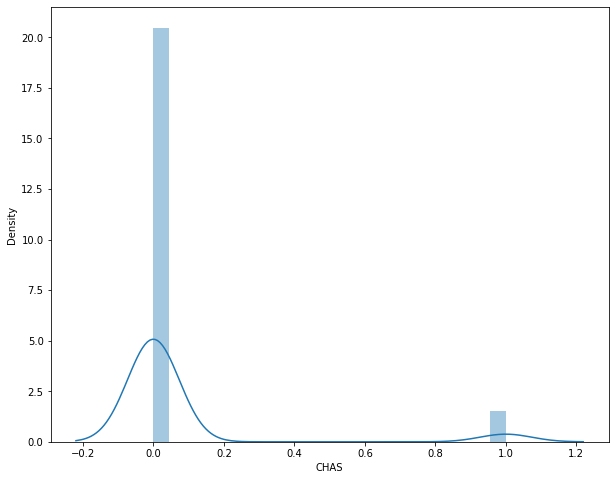

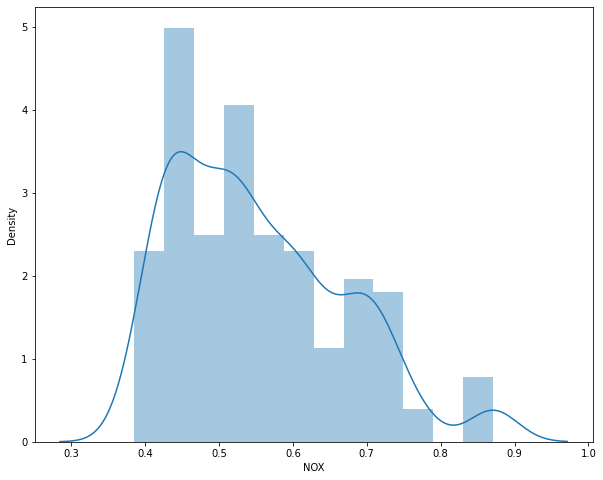

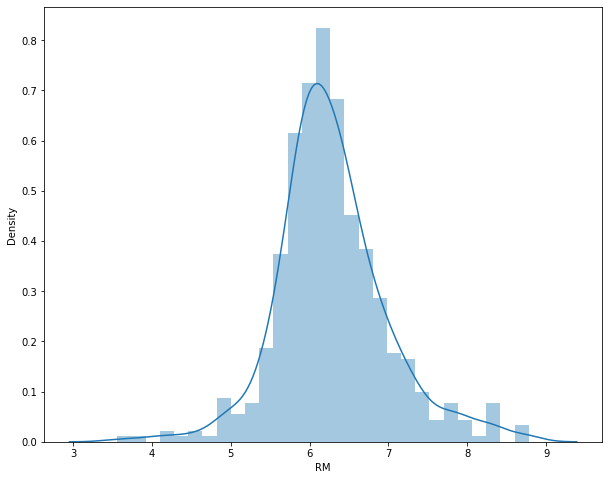

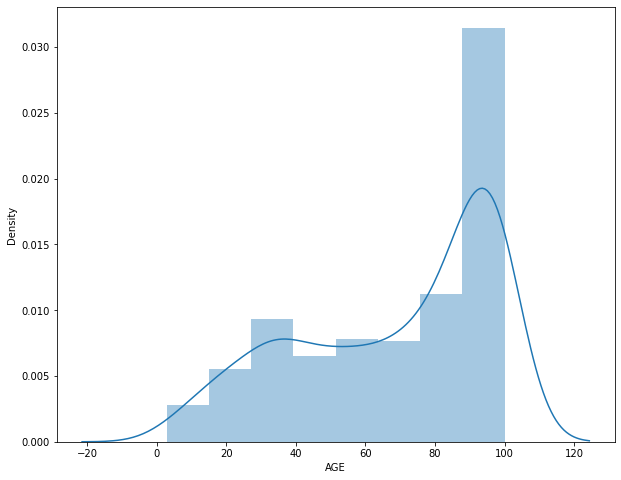

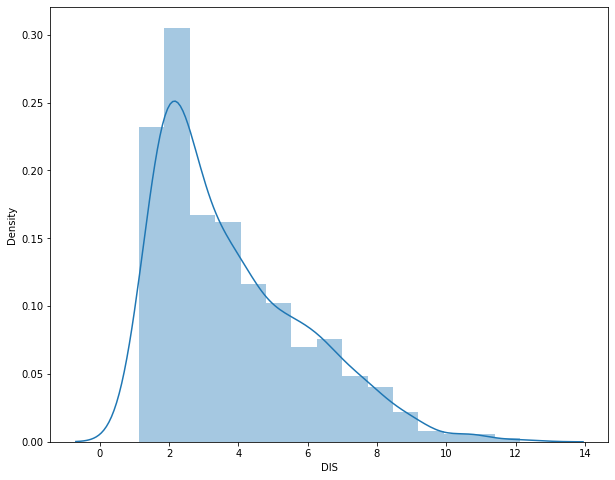

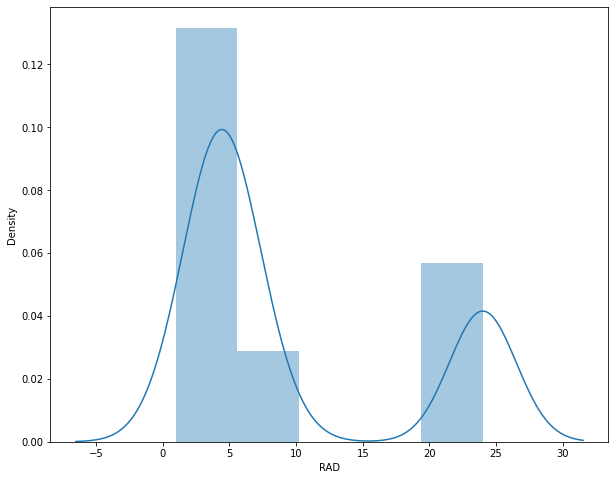

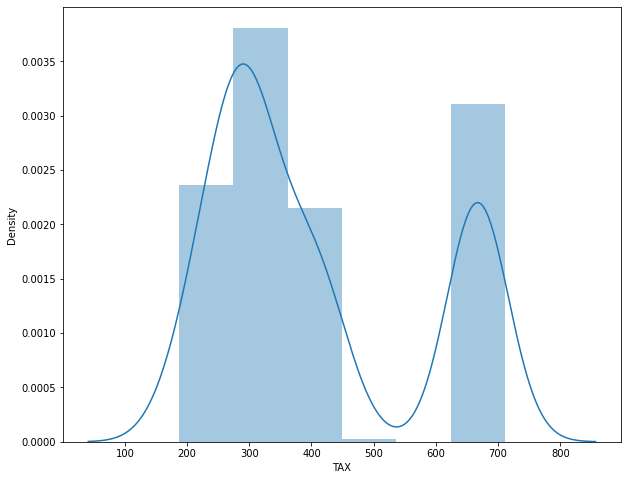

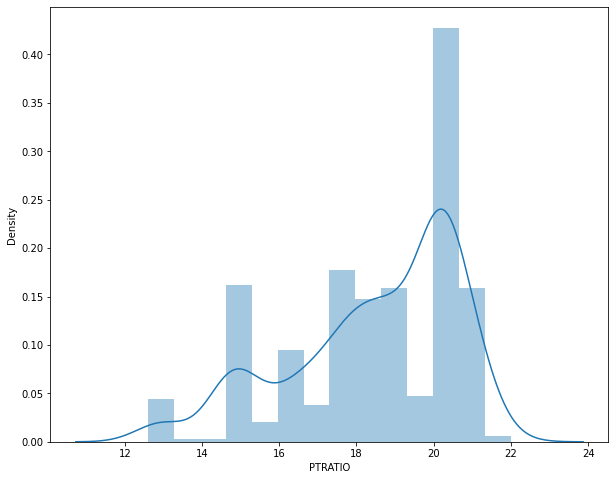

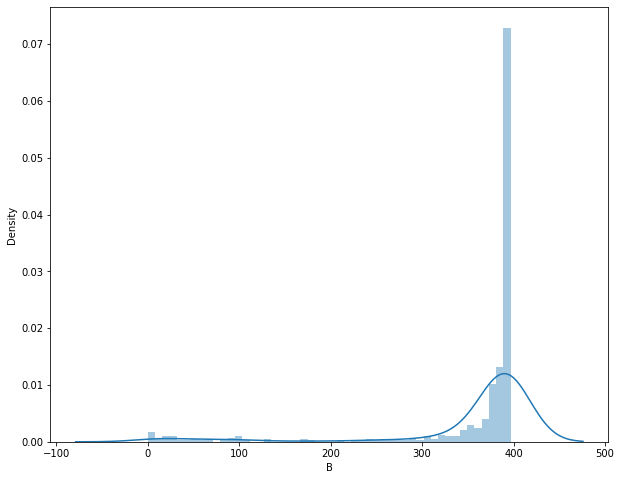

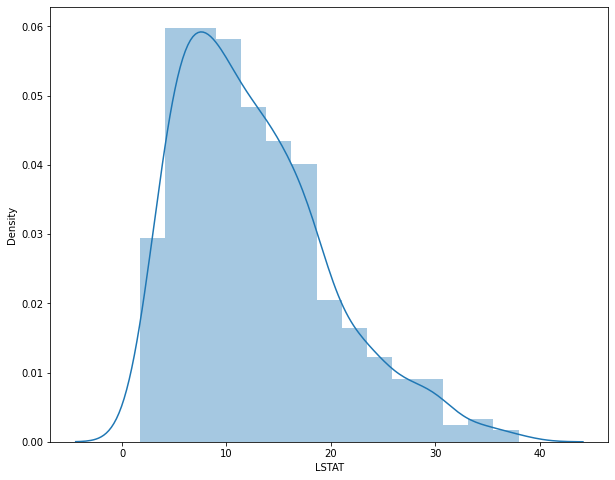

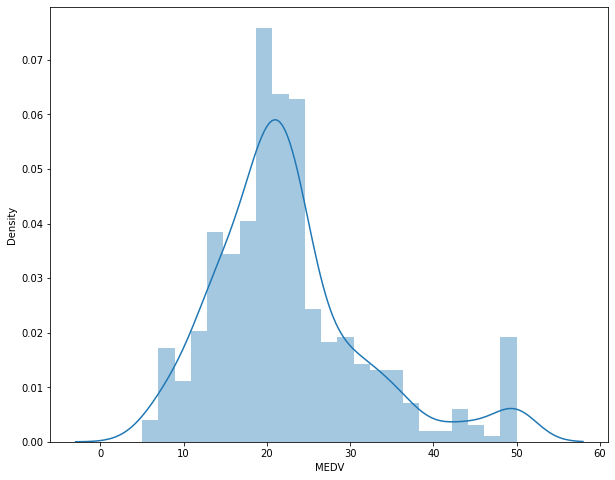

In [101]:
#Lets plot each variables and check its pattern of distribution
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

for i in df:
  plt.figure(figsize=(10,8))
  sns.distplot(df[i])